In [1]:
import numpy as np
import pandas as pd

Let's anyalyse train.csv

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [4]:
data.columns

Index(['textID', 'text', 'selected_text', 'sentiment'], dtype='object')

In [5]:
data.shape

(27481, 4)

So, 27481 rows and 4 columns

Let's analyse test.csv

In [6]:
test = pd.read_csv('test.csv')
test.head()

,textID,text,sentiment
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative
3,01082688c6,happy bday!,positive
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive


In [7]:
test.shape

(3534, 3)

So, we have to predict the selected text from the given text and sentiment

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


Huh, it looks like there are 1 text is missing...

In [9]:
data['text'].isnull().sum()

1

In [10]:
data['selected_text'].isnull().sum()

1

In [11]:
data['textID'].isnull().sum()

0

In [12]:
data['sentiment'].isnull().sum()

0

In [13]:
data[data['text'].isnull()] # By using conditional selecting we can see which row has the missing data.

,textID,text,selected_text,sentiment
314,fdb77c3752,NaN,NaN,neutral


Even though there is no text, the sentiment is neutral. Will it be better if I just remove this row?

In [14]:
data.dropna(inplace=True)

In [15]:
data['text'].isnull().sum()

0

I removed the 1 row which had no value.

In [16]:
data.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


selected_text is a subset of text

In [17]:
data.describe()

,textID,text,selected_text,sentiment
count,27480,27480,27480,27480
unique,27480,27480,22463,3
top,b622ed93ab,ouch acid reflux hurt too...,good,neutral
freq,1,1,199,11117


in the unique row of selected_text column, we can see that there are some selected_text which repeats.

There are only three sentiments: positive, negative and neutral.

In [18]:
print(data.groupby('sentiment').count())

           textID   text  selected_text
sentiment                              
negative     7781   7781           7781
neutral     11117  11117          11117
positive     8582   8582           8582


Most text's are neutral...positive next

Let's plot !

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

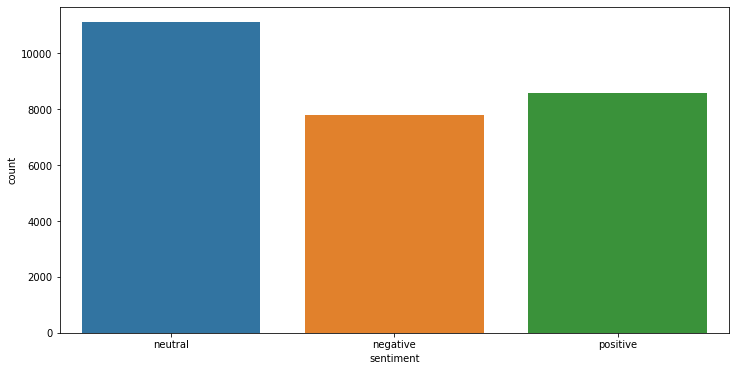

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(x='sentiment', data=data)

### Adding MetaFeatures to our data 

adding jaccard similarity index to our dataset

In [21]:
def jaccard(str1, str2): 
    a = set(str1.lower().split()) 
    b = set(str2.lower().split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

jaccard similarity or jaccard index is the similarity between two set/strings of values...it is defined by the no. of elements common to both the string(A intersection B) divided by the total number of elements(A union B)...you can see both strings as sets and thus use set operations.

In [22]:
results_jaccard=[]

for ind,row in data.iterrows():
    sentence1 = row.text
    sentence2 = row.selected_text

    jaccard_score = jaccard(sentence1,sentence2)
    results_jaccard.append(jaccard_score)

In [23]:
results_jaccard[0:10]

[1.0,
 0.2,
 0.16666666666666666,
 0.6,
 0.21428571428571427,
 1.0,
 0.07142857142857142,
 1.0,
 1.0,
 0.5]

So, we can see that there are some items which have received a jaccard score of 1.... meaning that the selected text is exactly the same as the text itself...no item will have 0 jaccard index bcz selected_text is a subset of text

Let's add the jaccard score to our data dataframe

In [24]:
data['jaccard_index'] = results_jaccard

In [25]:
data.head()

,textID,text,selected_text,sentiment,jaccard_index
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,1.000000
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,0.200000
2,088c60f138,my boss is bullying me...,bullying me,negative,0.166667
3,9642c003ef,what interview! leave me alone,leave me alone,negative,0.600000
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,0.214286


adding number of words in text, number of words in selected_text and the difference between the two in our data 

In [26]:
data['num_words_ST'] = data['selected_text'].apply(lambda x:len(str(x).split()))

In [27]:
data['num_words_T'] = data['text'].apply(lambda x:len(str(x).split()))

In [28]:
data['diff_in_words'] = data['num_words_T'] - data['num_words_ST']

In [29]:
data.head()

,textID,text,selected_text,sentiment,jaccard_index,num_words_ST,num_words_T,diff_in_words
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,1.000000,7,7,0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,0.200000,2,10,8
2,088c60f138,my boss is bullying me...,bullying me,negative,0.166667,2,5,3
3,9642c003ef,what interview! leave me alone,leave me alone,negative,0.600000,3,5,2
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,0.214286,3,14,11


Let's plot the meta-features

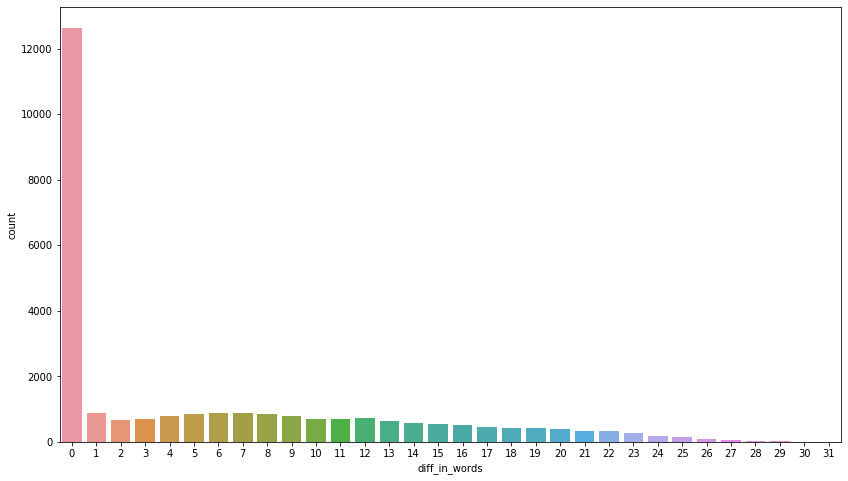

In [30]:
plt.figure(figsize=(14, 8))
sns.countplot(x='diff_in_words', data=data)

We can see that most of the rows have no differnce in their selected_text and text

In [31]:
data.shape

(27480, 8)

Out of 27480 rows, 12000 rows have the same number of words in their selected_text and text

Let's plot the jaccard index

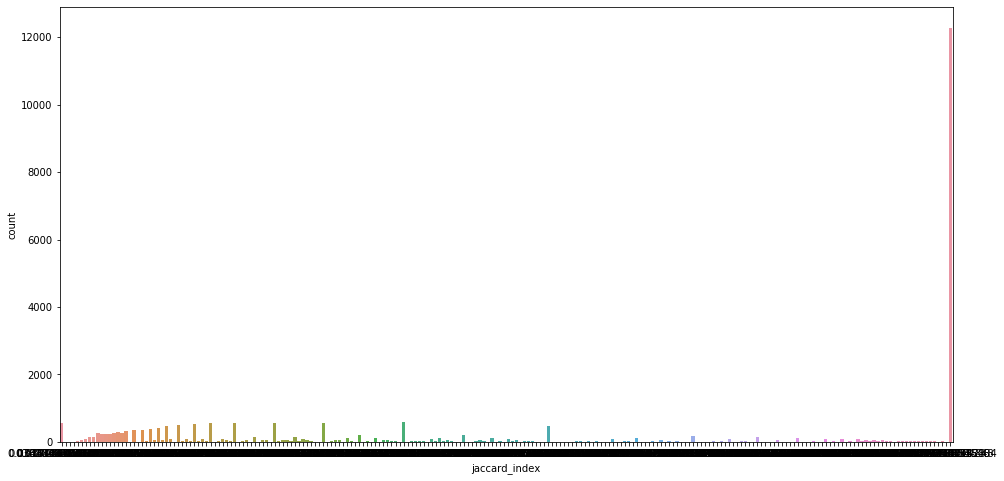

In [32]:
plt.figure(figsize=(16, 8))
sns.countplot(x='jaccard_index', data=data)

same result, of course......more than 12000 rows have jaccard index as 1....so do we remove those rows or ?

In [33]:
data.iloc[0:1]

,textID,text,selected_text,sentiment,jaccard_index,num_words_ST,num_words_T,diff_in_words
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,1.0,7,7,0


hmmm....not sure...let's leave it be for now.

### Cleaning our data

Now Before We Dive into extracting information out of words in text and selected text,let's first clean the data....bcz there are many symbols which do not convey sentiment but are there in the text

In [34]:
import re
import string

In [35]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [36]:
data['text'] = data['text'].apply(lambda x:clean_text(x))

In [37]:
data['selected_text'] = data['selected_text'].apply(lambda x:clean_text(x))

In [38]:
data.head()

,textID,text,selected_text,sentiment,jaccard_index,num_words_ST,num_words_T,diff_in_words
0,cb774db0d1,id have responded if i were going,id have responded if i were going,neutral,1.000000,7,7,0
1,549e992a42,sooo sad i will miss you here in san diego,sooo sad,negative,0.200000,2,10,8
2,088c60f138,my boss is bullying me,bullying me,negative,0.166667,2,5,3
3,9642c003ef,what interview leave me alone,leave me alone,negative,0.600000,3,5,2
4,358bd9e861,sons of why couldnt they put them on the rel...,sons of,negative,0.214286,3,14,11


so, any punctuation marks that might have been there are now removed...bcz sentiments are not decided by punctuation marks

#### What are the most common words in our target: selected_text?

In [39]:
from collections import Counter
data['temp_list'] = data['selected_text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in data['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,i,7200
1,to,5305
2,the,4590
3,a,3538
4,my,2783
5,you,2624
6,and,2321
7,it,2158
8,is,2115
9,in,1986


Now, we have to remove the stopwords...Stopwords are the English words which does not add much meaning to a sentence....like I which takes the first place in our count

In [40]:
from nltk.corpus import stopwords

In [41]:
def remove_stopword(x):
    return [y for y in x if y not in stopwords.words('english')]

In [42]:
data.head()

,textID,text,selected_text,sentiment,jaccard_index,num_words_ST,num_words_T,diff_in_words,temp_list
0,cb774db0d1,id have responded if i were going,id have responded if i were going,neutral,1.000000,7,7,0,"[id, have, responded, if, i, were, going]"
1,549e992a42,sooo sad i will miss you here in san diego,sooo sad,negative,0.200000,2,10,8,"[sooo, sad]"
2,088c60f138,my boss is bullying me,bullying me,negative,0.166667,2,5,3,"[bullying, me]"
3,9642c003ef,what interview leave me alone,leave me alone,negative,0.600000,3,5,2,"[leave, me, alone]"
4,358bd9e861,sons of why couldnt they put them on the rel...,sons of,negative,0.214286,3,14,11,"[sons, of]"


In [43]:
data['temp_list'] = data['temp_list'].apply(lambda x:remove_stopword(x))

In [44]:
data.head()

,textID,text,selected_text,sentiment,jaccard_index,num_words_ST,num_words_T,diff_in_words,temp_list
0,cb774db0d1,id have responded if i were going,id have responded if i were going,neutral,1.000000,7,7,0,"[id, responded, going]"
1,549e992a42,sooo sad i will miss you here in san diego,sooo sad,negative,0.200000,2,10,8,"[sooo, sad]"
2,088c60f138,my boss is bullying me,bullying me,negative,0.166667,2,5,3,[bullying]
3,9642c003ef,what interview leave me alone,leave me alone,negative,0.600000,3,5,2,"[leave, alone]"
4,358bd9e861,sons of why couldnt they put them on the rel...,sons of,negative,0.214286,3,14,11,[sons]


So, we can see that useless words which not have much meaning in sentences(also called as stopwords) have been removed!!!! Let's see what's the count of selected_text now

In [45]:
top = Counter([item for sublist in data['temp_list'] for item in sublist]) #this is a a very cool code it returns the most
#occuring items in a list !!!!
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,im,1676
1,good,1251
2,day,1058
3,love,909
4,happy,852
5,like,774
6,get,772
7,dont,765
8,go,700
9,cant,613


Hmmmmm.....Im was not removed after applying the remove stopwords function....should I remove it ???

In [46]:
data.head()

,textID,text,selected_text,sentiment,jaccard_index,num_words_ST,num_words_T,diff_in_words,temp_list
0,cb774db0d1,id have responded if i were going,id have responded if i were going,neutral,1.000000,7,7,0,"[id, responded, going]"
1,549e992a42,sooo sad i will miss you here in san diego,sooo sad,negative,0.200000,2,10,8,"[sooo, sad]"
2,088c60f138,my boss is bullying me,bullying me,negative,0.166667,2,5,3,[bullying]
3,9642c003ef,what interview leave me alone,leave me alone,negative,0.600000,3,5,2,"[leave, alone]"
4,358bd9e861,sons of why couldnt they put them on the rel...,sons of,negative,0.214286,3,14,11,[sons]


In [47]:
[item for sublist in data['temp_list'] for item in sublist] # I do not understand this code

['id',
 'responded',
 'going',
 'sooo',
 'sad',
 'bullying',
 'leave',
 'alone',
 'sons',
 'shameless',
 'plugging',
 'best',
 'rangers',
 'forum',
 'earth',
 'fun',
 'soooo',
 'high',
 'wow',
 'u',
 'became',
 'cooler',
 'much',
 'love',
 'hopeful',
 'reckon',
 'chances',
 'minimal',
 'p',
 'im',
 'never',
 'gonna',
 'get',
 'cake',
 'stuff',
 'like',
 'dangerously',
 'lost',
 'test',
 'test',
 'lg',
 'uh',
 'oh',
 'sunburned',
 'sigh',
 'sick',
 'onna',
 'hes',
 'oh',
 'marly',
 'im',
 'sorry',
 'hope',
 'find',
 'soon',
 'interesting',
 'cleaning',
 'house',
 'family',
 'comming',
 'later',
 'today',
 'gotta',
 'restart',
 'computer',
 'thought',
 'supposed',
 'put',
 'end',
 'constant',
 'rebootiness',
 'see',
 'wat',
 'mean',
 'bout',
 'friidays',
 'called',
 'lose',
 'friday',
 'smh',
 'free',
 'fillin',
 'app',
 'ipod',
 'fun',
 'im',
 'addicted',
 'im',
 'sorry',
 'internet',
 'fun',
 'power',
 'back',
 'working',
 'quiteheavenly',
 'hope',
 'well',
 'much',
 'unhappy',
 'minut

In [48]:
next(data.iterrows())

(0,
 textID                                   cb774db0d1
 text              id have responded if i were going
 selected_text     id have responded if i were going
 sentiment                                   neutral
 jaccard_index                                     1
 num_words_ST                                      7
 num_words_T                                       7
 diff_in_words                                     0
 temp_list                    [id, responded, going]
 Name: 0, dtype: object)

In [49]:
def removeim(x):
    y = []
    for i in x:
        if i!='im':
            y.append(i)
    return y

In [50]:
data['temp_list'] = data['temp_list'].apply(lambda x:removeim(x))

In [51]:
data.head()

,textID,text,selected_text,sentiment,jaccard_index,num_words_ST,num_words_T,diff_in_words,temp_list
0,cb774db0d1,id have responded if i were going,id have responded if i were going,neutral,1.000000,7,7,0,"[id, responded, going]"
1,549e992a42,sooo sad i will miss you here in san diego,sooo sad,negative,0.200000,2,10,8,"[sooo, sad]"
2,088c60f138,my boss is bullying me,bullying me,negative,0.166667,2,5,3,[bullying]
3,9642c003ef,what interview leave me alone,leave me alone,negative,0.600000,3,5,2,"[leave, alone]"
4,358bd9e861,sons of why couldnt they put them on the rel...,sons of,negative,0.214286,3,14,11,[sons]


I have removed all im words in temp_list....let's see which is the most common words in selected_text now!!

In [52]:
top = Counter([item for sublist in data['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,good,1251
1,day,1058
2,love,909
3,happy,852
4,like,774
5,get,772
6,dont,765
7,go,700
8,cant,613
9,work,612


So, we can see that good is the most common word in selected_text !!!

What is the most common word in text?

In [53]:
data['temp_list1'] = data['text'].apply(lambda x:x.split())

In [54]:
data.head()

,textID,text,selected_text,sentiment,jaccard_index,num_words_ST,num_words_T,diff_in_words,temp_list,temp_list1
0,cb774db0d1,id have responded if i were going,id have responded if i were going,neutral,1.000000,7,7,0,"[id, responded, going]","[id, have, responded, if, i, were, going]"
1,549e992a42,sooo sad i will miss you here in san diego,sooo sad,negative,0.200000,2,10,8,"[sooo, sad]","[sooo, sad, i, will, miss, you, here, in, san,..."
2,088c60f138,my boss is bullying me,bullying me,negative,0.166667,2,5,3,[bullying],"[my, boss, is, bullying, me]"
3,9642c003ef,what interview leave me alone,leave me alone,negative,0.600000,3,5,2,"[leave, alone]","[what, interview, leave, me, alone]"
4,358bd9e861,sons of why couldnt they put them on the rel...,sons of,negative,0.214286,3,14,11,[sons],"[sons, of, why, couldnt, they, put, them, on, ..."


In [55]:
[item for sublist in data['temp_list1'] for item in sublist] # I kinda understand it now !!

['id',
 'have',
 'responded',
 'if',
 'i',
 'were',
 'going',
 'sooo',
 'sad',
 'i',
 'will',
 'miss',
 'you',
 'here',
 'in',
 'san',
 'diego',
 'my',
 'boss',
 'is',
 'bullying',
 'me',
 'what',
 'interview',
 'leave',
 'me',
 'alone',
 'sons',
 'of',
 'why',
 'couldnt',
 'they',
 'put',
 'them',
 'on',
 'the',
 'releases',
 'we',
 'already',
 'bought',
 'some',
 'shameless',
 'plugging',
 'for',
 'the',
 'best',
 'rangers',
 'forum',
 'on',
 'earth',
 'feedings',
 'for',
 'the',
 'baby',
 'are',
 'fun',
 'when',
 'he',
 'is',
 'all',
 'smiles',
 'and',
 'coos',
 'soooo',
 'high',
 'both',
 'of',
 'you',
 'journey',
 'wow',
 'u',
 'just',
 'became',
 'cooler',
 'hehe',
 'is',
 'that',
 'possible',
 'as',
 'much',
 'as',
 'i',
 'love',
 'to',
 'be',
 'hopeful',
 'i',
 'reckon',
 'the',
 'chances',
 'are',
 'minimal',
 'p',
 'im',
 'never',
 'gonna',
 'get',
 'my',
 'cake',
 'and',
 'stuff',
 'i',
 'really',
 'really',
 'like',
 'the',
 'song',
 'love',
 'story',
 'by',
 'taylor',
 'sw

In [56]:
#If i just want each row as a list:
[sublist for sublist in data['temp_list1']]

[['id', 'have', 'responded', 'if', 'i', 'were', 'going'],
 ['sooo', 'sad', 'i', 'will', 'miss', 'you', 'here', 'in', 'san', 'diego'],
 ['my', 'boss', 'is', 'bullying', 'me'],
 ['what', 'interview', 'leave', 'me', 'alone'],
 ['sons',
  'of',
  'why',
  'couldnt',
  'they',
  'put',
  'them',
  'on',
  'the',
  'releases',
  'we',
  'already',
  'bought'],
 ['some',
  'shameless',
  'plugging',
  'for',
  'the',
  'best',
  'rangers',
  'forum',
  'on',
  'earth'],
 ['feedings',
  'for',
  'the',
  'baby',
  'are',
  'fun',
  'when',
  'he',
  'is',
  'all',
  'smiles',
  'and',
  'coos'],
 ['soooo', 'high'],
 ['both', 'of', 'you'],
 ['journey',
  'wow',
  'u',
  'just',
  'became',
  'cooler',
  'hehe',
  'is',
  'that',
  'possible'],
 ['as',
  'much',
  'as',
  'i',
  'love',
  'to',
  'be',
  'hopeful',
  'i',
  'reckon',
  'the',
  'chances',
  'are',
  'minimal',
  'p',
  'im',
  'never',
  'gonna',
  'get',
  'my',
  'cake',
  'and',
  'stuff'],
 ['i',
  'really',
  'really',
  'l

In [57]:
#Now, we have to remove all the stopwords from 
data['temp_list1'] = data['temp_list1'].apply(lambda x:remove_stopword(x))

In [58]:
data.head()

,textID,text,selected_text,sentiment,jaccard_index,num_words_ST,num_words_T,diff_in_words,temp_list,temp_list1
0,cb774db0d1,id have responded if i were going,id have responded if i were going,neutral,1.000000,7,7,0,"[id, responded, going]","[id, responded, going]"
1,549e992a42,sooo sad i will miss you here in san diego,sooo sad,negative,0.200000,2,10,8,"[sooo, sad]","[sooo, sad, miss, san, diego]"
2,088c60f138,my boss is bullying me,bullying me,negative,0.166667,2,5,3,[bullying],"[boss, bullying]"
3,9642c003ef,what interview leave me alone,leave me alone,negative,0.600000,3,5,2,"[leave, alone]","[interview, leave, alone]"
4,358bd9e861,sons of why couldnt they put them on the rel...,sons of,negative,0.214286,3,14,11,[sons],"[sons, couldnt, put, releases, already, bought]"


In [59]:
top = Counter([item for sublist in data['temp_list1'] for item in sublist])

In [60]:
top #this is what top is

Counter({'id': 161,
         'responded': 1,
         'going': 1096,
         'sooo': 108,
         'sad': 474,
         'miss': 614,
         'san': 19,
         'diego': 11,
         'boss': 22,
         'bullying': 1,
         'interview': 27,
         'leave': 139,
         'alone': 84,
         'sons': 8,
         'couldnt': 119,
         'put': 152,
         'releases': 2,
         'already': 243,
         'bought': 72,
         'shameless': 1,
         'plugging': 3,
         'best': 306,
         'rangers': 3,
         'forum': 7,
         'earth': 22,
         'feedings': 1,
         'baby': 159,
         'fun': 527,
         'smiles': 11,
         'coos': 1,
         'soooo': 70,
         'high': 72,
         'journey': 11,
         'wow': 190,
         'u': 923,
         'became': 10,
         'cooler': 6,
         'hehe': 75,
         'possible': 22,
         'much': 659,
         'love': 1122,
         'hopeful': 7,
         'reckon': 6,
         'chances': 5,
         'mi

In [61]:
type(top)

collections.Counter

In [73]:
#we can convert Counter object to a dataframe:
temp = pd.DataFrame(top.most_common(25))
temp = temp.iloc[:,:]
temp.columns = ['Common Words', 'Count']

In [68]:
temp

,0,1
0,im,3020
1,day,2044
2,good,1549
3,get,1426
4,like,1346
5,go,1267
6,dont,1200
7,love,1122
8,work,1112
9,going,1096


So, we can see that im is the most common...ignoring that day is the most common word in data['text'] column !!

import plotly.express as px
fig = px.bar(temp, x="Count", y="Common Words", title='Commmon Words in Text', orientation='h', 
             width=700, height=700,color='Common Words')
fig.show() #press Y to change it to code block

### Most Common words sentiment-wise

In [80]:
positive = data[data['sentiment'] == 'positive']
negative = data[data['sentiment'] == 'negative']
neutral = data[data['sentiment'] == 'neutral']

#### Most Common words in positive tweets

In [93]:
temp = [item for list in positive['temp_list'] for item in list]
top = Counter(temp)
top_positive = pd.DataFrame(top.most_common(20))
top_positive.columns = ['Common Words', 'Count']
top_positive

,Common Words,Count
0,good,826
1,happy,730
2,love,697
3,day,456
4,thanks,439
5,great,364
6,fun,287
7,nice,267
8,mothers,259
9,hope,245


#### Most common words in negative tweets

In [94]:
temp = [item for list in negative['temp_list'] for item in list]
top = Counter(temp)
top_negative = pd.DataFrame(top.most_common(20))
top_negative.columns = ['Common Words', 'Count']
top_negative

,Common Words,Count
0,miss,358
1,sad,343
2,sorry,300
3,bad,246
4,hate,230
5,dont,221
6,cant,201
7,sick,166
8,like,162
9,sucks,159


#### Most Common words in neutral tweets

In [96]:
temp = [item for list in neutral['temp_list'] for item in list]
top = Counter(temp)
top_neutral = pd.DataFrame(top.most_common(20))
top_neutral.columns = ['Common Words', 'Count']
top_neutral

,Common Words,Count
0,get,612
1,go,569
2,day,492
3,dont,482
4,going,472
5,work,467
6,like,445
7,got,441
8,today,427
9,lol,427


We have looked at the top used words in each sentiment-wise word tweets !!!

In [98]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_submission = pd.read_csv('sample_submission.csv')

In [99]:
df_train.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [100]:
df_train['Num_words_text'] = df_train['text'].apply(lambda x:len(str(x).split()))

In [101]:
df_train = df_train[df_train['Num_words_text']>=3]

In [102]:
len(df_train)

26752

In [103]:
def save_model(output_dir, nlp, new_model_name):
    ''' This Function Saves model to 
    given output directory'''
    
    output_dir = f'../working/{output_dir}'
    if output_dir is not None:        
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
        nlp.meta["name"] = new_model_name
        nlp.to_disk(output_dir)
        print("Saved model to", output_dir)

In [104]:
def get_model_out_path(sentiment):
    '''
    Returns Model output path
    '''
    model_out_path = None
    if sentiment == 'positive':
        model_out_path = 'models/model_pos'
    elif sentiment == 'negative':
        model_out_path = 'models/model_neg'
    return model_out_path

In [105]:
def get_training_data(sentiment):
    '''
    Returns Trainong data in the format needed to train spacy NER
    '''
    train_data = []
    for index, row in df_train.iterrows():
        if row.sentiment == sentiment:
            selected_text = row.selected_text
            text = row.text
            start = text.find(selected_text)
            end = start + len(selected_text)
            train_data.append((text, {"entities": [[start, end, 'selected_text']]}))
    return train_data

In [107]:

def train(train_data, output_dir, n_iter=20, model=None):
    """Load the model, set up the pipeline and train the entity recognizer."""
    ""
    if model is not None:
        nlp = spacy.load(output_dir)  # load existing spaCy model
        print("Loaded model '%s'" % model)
    else:
        nlp = spacy.blank("en")  # create blank Language class
        print("Created blank 'en' model")
    
    # create the built-in pipeline components and add them to the pipeline
    # nlp.create_pipe works for built-ins that are registered with spaCy
    if "ner" not in nlp.pipe_names:
        ner = nlp.create_pipe("ner")
        nlp.add_pipe(ner, last=True)
    # otherwise, get it so we can add labels
    else:
        ner = nlp.get_pipe("ner")
    
    # add labels
    for _, annotations in train_data:
        for ent in annotations.get("entities"):
            ner.add_label(ent[2])

    # get names of other pipes to disable them during training
    other_pipes = [pipe for pipe in nlp.pipe_names if pipe != "ner"]
    with nlp.disable_pipes(*other_pipes):  # only train NER
        # sizes = compounding(1.0, 4.0, 1.001)
        # batch up the examples using spaCy's minibatch
        if model is None:
            nlp.begin_training()
        else:
            nlp.resume_training()


        for itn in tqdm(range(n_iter)):
            random.shuffle(train_data)
            batches = minibatch(train_data, size=compounding(4.0, 500.0, 1.001))    
            losses = {}
            for batch in batches:
                texts, annotations = zip(*batch)
                nlp.update(texts,  # batch of texts
                            annotations,  # batch of annotations
                            drop=0.5,   # dropout - make it harder to memorise data
                            losses=losses, 
                            )
            print("Losses", losses)
    save_model(output_dir, nlp, 'st_ner')

In [115]:
import spacy
from tqdm import tqdm
import random
from spacy.util import minibatch
from spacy.util import compounding
import os
sentiment = 'positive'

train_data = get_training_data(sentiment)
model_path = get_model_out_path(sentiment)
# For DEmo Purposes I have taken 3 iterations you can train the model as you want
train(train_data, model_path, n_iter=3, model=None)

  0%|                                                                                                | 0/3 [00:00<?, ?it/s]

Created blank 'en' model


 33%|█████████████████████████████▎                                                          | 1/3 [01:08<02:17, 68.76s/it]

Losses {'ner': 33820.54045392887}


 67%|██████████████████████████████████████████████████████████▋                             | 2/3 [02:24<01:10, 70.83s/it]

Losses {'ner': 30884.24250881766}


100%|████████████████████████████████████████████████████████████████████████████████████████| 3/3 [03:38<00:00, 72.99s/it]

Losses {'ner': 29750.668025989333}
Saved model to ../working/models/model_pos


In [116]:
sentiment = 'negative'

train_data = get_training_data(sentiment)
model_path = get_model_out_path(sentiment)

train(train_data, model_path, n_iter=3, model=None)

  0%|                                                                                                | 0/3 [00:00<?, ?it/s]

Created blank 'en' model


C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "Guys (    ) I know! My ability to read time tellin..." with entities "[[57, 65, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "  And it`s only downhill from now until Labor Day!" with entities "[[14, 24, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "  dont make me sad... i do agree tho it does need ..." with entities "[[13, 18, 'selected_t

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "mothers day..didnt do anything exciting...saw a mo..." with entities "[[13, 41, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "I think I have hayfever. Not sure due to wearing n..." with entities "[[68, 79, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "At work... supposed to be a day off but too much w..." with entities "[[40, 68, 'selecte

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "Oh..I`m so borin`.. why not play the computer?? My..." with entities "[[11, 18, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "The arrival of cargo Red G5 to Toronto has been po..." with entities "[[87, 106, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "i`m kinda sad of being alone all the time i miss m..." with entities "[[74, 80, 'select

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text " hahahah of course  they have such a nasty display..." with entities "[[28, 58, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "mom just woke me u[p and i am so mad i was dreamin..." with entities "[[106, 114, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "I definitely missed listening to The Spill Canvas,..." with entities "[[13, 18, 'selec

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text " - So sorry Ambien got sick.  Perhaps work her ash..." with entities "[[21, 28, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "  get back to tokyo man..we miss you." with entities "[[26, 36, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text " I know.  I have such guilt associated with pickin..." with entities "[[20, 27, 'selected_text']]". Use 

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text " im home alone in the house and imma scared  x" with entities "[[35, 43, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "Now i feel really really bad...sorry" with entities "[[25, 30, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "Rest in peace marshall" with entities "[[0, 16, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "  YOU`RE FAKING IT! Hahaha...I kid." with entities "[[7, 15, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "is back home now      gonna miss every one" with entities "[[23, 27, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "i think they are working why eyes are drooping  it..." with entities "[[50, 96, 'selected_text']]". Use `spacy.gold.bi

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text " revising as uni exams are looming" with entities "[[25, 34, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "Kinda may have chickened out..." with entities "[[0, 30, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text " i`m watchign the garden from the window...far too..." with entities "[[42, 61, 'selected_text']]". Use `spacy.gold.biluo_tags_fro

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "Okay, the man with the hook for a hand is kinda fr..." with entities "[[39, 66, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text " nope  i`m bored and hungry." with entities "[[9, 16, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "   plus, it is going to clash with ugly betty when..." with entities "[[12, 27, 'selected_text']]". Use `spacy.gol

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "_leigh u know wut devy dev it sure does suck havin..." with entities "[[78, 90, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "Officially out of my apt  Learned some stuff about..." with entities "[[107, 114, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "Can`t give blood within a year of getting a tattoo..." with entities "[[68, 78, 'selec

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "  EEW  Cheese. I hate cheese." with entities "[[15, 20, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text " Or he`s gonna chop you up into tiny bits - one of..." with entities "[[2, 41, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "i would slip and fall... on the dirty school bathr..." with entities "[[0, 23, 'selected_text']]". Use `spacy.gol

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "  #wci hashtag simply isn`t dying out anytime soon..." with entities "[[26, 50, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "  It is so unfair, Hustlaball, US citizens working..." with entities "[[9, 17, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "mannnn..... _ got an iphone!!! im jealous....  htt..." with entities "[[34, 43, 'selected

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text ": I`m sure lots of that studio equipment was colle..." with entities "[[109, 122, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text " kenny u alive!!!...I`m here getting da hair done...." with entities "[[90, 95, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "Hmm, $25 to see the Decemberists, but I have to go..." with entities "[[92, 100, 'sele

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text " Hey girl!  Yeah, my allergies kick in at the most..." with entities "[[19, 35, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "I`m so lost without my laptop. And no break again ..." with entities "[[64, 82, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "Is sad when people`s phones are dead" with entities "[[0, 9, 'selected_text']]". Use `sp

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "im tweeting... this is so hard... i dont get it..." with entities "[[23, 32, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text " but...he`s..mine  you told me a couple of weeks a..." with entities "[[60, 92, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "I wanna buy a million copies. But i aint that rich..." with entities "[[31, 85, 'selected_t

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "Twenty minutes on a **** call you would think that..." with entities "[[0, 32, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "I`m sooo lost without my car  This is truly depres..." with entities "[[42, 55, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "i`m so sick   bad throat and the WORST toothache. ..." with entities "[[31, 38, 'selected

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text " I had bad net issues on Weds so couldn`t broadcas..." with entities "[[5, 10, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "mom is ok so far. just missing jaron" with entities "[[18, 34, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "Wait...  and ... Electrik Red or Richgirl?  I`m a ..." with entities "[[40, 68, 'selected_text']]". Use `s

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "_juneau I did, until my parents got all f`d up and..." with entities "[[15, 49, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text " *bows*  I try...sometimes it is hard" with entities "[[15, 37, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text " me too  she better be back soon! dude, this is my..." with entities "[[49, 58, 'selected_text']]". Use 

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text " i`m using paint.net x64 and it`s running crazily ..." with entities "[[74, 88, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "i waited too long to buy pink tickets!  now we`re ..." with entities "[[81, 86, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text " 1000 = make sure it has the word poo or balls in ..." with entities "[[81, 99, 'selecte

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text " Hi  Yes wasn`t she absolutely terrible! How on ea..." with entities "[[18, 40, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text " I dunno...I thought I was funny" with entities "[[10, 32, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "well...gotta grab at least an hour and a half slee..." with entities "[[89, 135, 'selected_text']]". Use `spa

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text " I would much rather you didn`t punch yourself in ..." with entities "[[60, 74, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text " nope- dnt have wireless ne more  HATERS!!!! Ugh....." with entities "[[31, 40, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text " it`s a modded 360, so you can`t send it back?  Th..." with entities "[[69, 76, 'selecte

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text " yo wake your **** up  and go to work  go get that..." with entities "[[66, 74, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text " o its feels like a hot box and no matter where i ..." with entities "[[11, 30, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "@_Glitter_  kk but 4 sum reason its not lettin me ..." with entities "[[34, 61, 'selecte

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "is on twitter for the second day running. This is ..." with entities "[[1, 111, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text " Umm..ok..just don`t start cats on fire..  ...prom..." with entities "[[9, 41, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text " get better omg i still dont believe that i didn`t..." with entities "[[77, 86, 'selected

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "is house bound with acute mumps  bad times.... who..." with entities "[[15, 43, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "_newman i just called and it`s sold out.  bummer. ..." with entities "[[39, 52, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text " Aw poor you..ironing! Eek! lol It`s raining here ..." with entities "[[99, 126, 'select

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "http://twitpic.com/675u6 - Square B - she is sad b..." with entities "[[45, 51, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "Its sooooooooo not funny when I have to move from ..." with entities "[[0, 27, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "dog just farted  so bad....." with entities "[[20, 24, 'selected_text']]". Use `spacy.gol

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text " i think i hate you.  i didnt really want to but y..." with entities "[[47, 72, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "dont get to see my boys tomorroww.im sad" with entities "[[34, 40, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "I REALLY  should have gone to the Chiropractor thi..." with entities "[[78, 85, 'selected_text']]". U

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text " I`m sorry, but x-men sucks... in a bad way!  ;p" with entities "[[22, 28, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text " I always feel guilty about it" with entities "[[8, 21, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "had plans with people but they cancelled...now wha..." with entities "[[31, 42, 'selected_text']]". Use `spacy.gold.b

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text " Their inability to manage money, tough job market..." with entities "[[5, 16, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text " please do  I`ll settle for cheap cider for meetin..." with entities "[[9, 39, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "It`s gloomy as hell outside today." with entities "[[15, 22, 'selected_text']]". Use `spac

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text " i did and i feel great....   but i still miss it...." with entities "[[39, 45, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text " Yep, exactly   And I`m really sad about this tour..." with entities "[[1, 91, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "Right, **** the whole Twitter silence experiment. ..." with entities "[[7, 40, 'selected_

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "_Star95 oh so you know how I feel then  **** repre..." with entities "[[78, 102, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text " I need to do some more post but I don`t have time..." with entities "[[75, 108, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "http://twitpic.com/66ydb -  I made sure you got cr..." with entities "[[79, 112, 'sele

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "Thanks for the follow my new Twitpeeps!" with entities "[[0, 9, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "is feeling her eyes burned-fried after 10 hours at..." with entities "[[20, 28, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text " i know.. i suck.. i`m a master procrastinator  ....." with entities "[[10, 17, 'selected_text']]". Use 

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "has the urge to go shopping.hmmm but i`ve got no m..." with entities "[[33, 56, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text " she`s in LA, wanting sun today... but apparently ..." with entities "[[51, 70, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "My flip flop just broke...walking in downtown seat..." with entities "[[18, 25, 'selecte

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "The chicken noodle soup I made for lunch to feel b..." with entities "[[83, 98, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text " blue skies? where, it`s still grey and hazy out o..." with entities "[[29, 44, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "Ugh! I can`t access through my mobile web!" with entities "[[0, 15, 'selected_text']]". 

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text " yeah doesn`t that suck!  I am working with a Nano..." with entities "[[92, 100, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text " ooow those look painful, poor bb" with entities "[[10, 33, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text " I had a double cheeseburger and fries from The Go..." with entities "[[64, 81, 'selected_text']]". Use `sp

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text " Celebrity sighting: Spongebobs here! #BEA09   LOL..." with entities "[[81, 88, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "There is something wrong with me! I`m so tired I c..." with entities "[[9, 27, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text " _kat I`ve begged my mum to lt me get them out the..." with entities "[[99, 107, 'selecte

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "im so not feelinq this huqe **** pimple smack in t..." with entities "[[75, 88, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text " I`m sorry about your car. I feel for you..." with entities "[[1, 43, 'selected_text']]". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.

C:\Users\KIIT\anaconda3\lib\site-packages\spacy\language.py:482: UserWarning:

[W030] Some entities could not be aligned in the text "   People are cruel sometimes.  I can`t imagine be..." with entities "[[3, 28, 'selected_text']]".

Losses {'ner': 32123.792404081207}


 67%|██████████████████████████████████████████████████████████▋                             | 2/3 [02:20<01:10, 70.25s/it]

Losses {'ner': 28874.46996561622}


100%|████████████████████████████████████████████████████████████████████████████████████████| 3/3 [03:27<00:00, 69.29s/it]

Losses {'ner': 27161.839791838494}
Saved model to ../working/models/model_neg


In [117]:
def predict_entities(text, model):
    doc = model(text)
    ent_array = []
    for ent in doc.ents:
        start = text.find(ent.text)
        end = start + len(ent.text)
        new_int = [start, end, ent.label_]
        if new_int not in ent_array:
            ent_array.append([start, end, ent.label_])
    selected_text = text[ent_array[0][0]: ent_array[0][1]] if len(ent_array) > 0 else text
    return selected_text

In [124]:
selected_texts = []
MODELS_BASE_PATH = '../working/models/'

if MODELS_BASE_PATH is not None:
    print("Loading Models  from ", MODELS_BASE_PATH)
    model_pos = spacy.load(MODELS_BASE_PATH + 'model_pos')
    model_neg = spacy.load(MODELS_BASE_PATH + 'model_neg')
        
    for index, row in df_test.iterrows():
        text = row.text
        output_str = ""
        if row.sentiment == 'neutral' or len(text.split()) <= 2:
            selected_texts.append(text)
        elif row.sentiment == 'positive':
            selected_texts.append(predict_entities(text, model_pos))
        else:
            selected_texts.append(predict_entities(text, model_neg))
        
df_test['selected_text'] = selected_texts

Loading Models  from  ../working/models/


In [125]:
df_submission['selected_text'] = df_test['selected_text']
df_submission.to_csv("submission.csv", index=False)
display(df_submission.head(10))

,textID,selected_text
0,f87dea47db,Last session of the day http://twitpic.com/67ezh
1,96d74cb729,exciting
2,eee518ae67,"Recession hit Veronique Branquinho, she has to..."
3,01082688c6,happy bday!
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!
5,726e501993,that`s great!! weee!! visitors!
6,261932614e,I THINK EVERYONE HATES ME ON HERE lol
7,afa11da83f,"soooooo wish i could, but im in school and my..."
8,e64208b4ef,and within a short time of the last clue all ...
9,37bcad24ca,What did you get? My day is alright.. haven`...


In [ ]:
#finished !!!! did not undestand the last part...but just wanted to complete this...!!